#### Univariate Linear regression
Goal of this notebook is to understand the concepts of Linear regression, model parameters, cost function and gradient descent. I will create datasets manually and create a linear regression model based on that.

#### Section 1 - Creating Dataset
Creating a fake house price dataset using Numpy

In [28]:
import numpy as np
import matplotlib.pyplot as plt

In [29]:
x_train = np.array([1, 1.5, 2, 2.2, 2.75, 3, 4, 4.5, 5, 5.8]) # Size of house in 1000 sft
y_train = np.array([300, 312, 375, 400, 480, 500, 580, 630, 700, 840]) # Price of house in $1000

In [30]:
print(f"Size of x_train is {x_train.shape[0]}")
print(f"Size of y_train is {y_train.shape[0]}")
m = x_train.shape[0] # Number of training samples


Size of x_train is 10
Size of y_train is 10


##### Plotting the example dataset

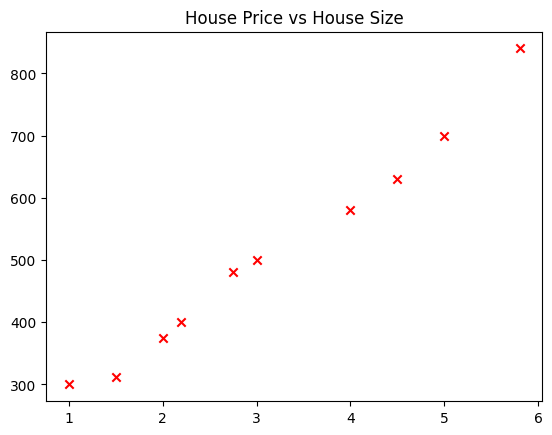

In [31]:
plt.scatter(x_train, y_train, marker="x", c="r")
plt.title("House Price vs House Size")
plt.show()

The plot shows that there is a liner relationship between the size of the house and the cost of the house, We will try to fit a model on this relationship in such a way that it is able to predict the correct house price
### Model
Our model is a fucntion that takes input features `x_train` and maps it to target variable `y_train`. Since there is a linear relationship between `x_train` and `y_train` we can use a straight line function to predict the values.  
Our function will look something like this `f{w,b}(X) = WX + B`. This is called a liner regression function.
'W' and 'B' are the parameters of the fucntion that we need to twek. with correct combination of W and B we will be able to predict vauels of X for through the fucntion

#### Section 2 - Parameters
In this section we will try to adjust W and B in a way to get the best model  
We will compute `f{w,b}(X)` which is our predicted values of the model for every value of `x_train`  
We will then try to change our model by adjusting the vlaues if W and B to make our model fit our data better

In [32]:
def get_fwb(w, b, x_train):
    f_wb = np.zeros(m)
    for i in range(m):
        f_wb[i] = w * x_train[i] + b # Liner Regression Model
    return f_wb

In [33]:
w = 105
b = 175

f_wb = get_fwb(w, b, x_train) # Predicted values of our model or y_pred
print(f"Values in fwb is {f_wb}")
print(f"Size of f_wb is {f_wb.shape[0]}")

Values in fwb is [280.   332.5  385.   406.   463.75 490.   595.   647.5  700.   784.  ]
Size of f_wb is 10


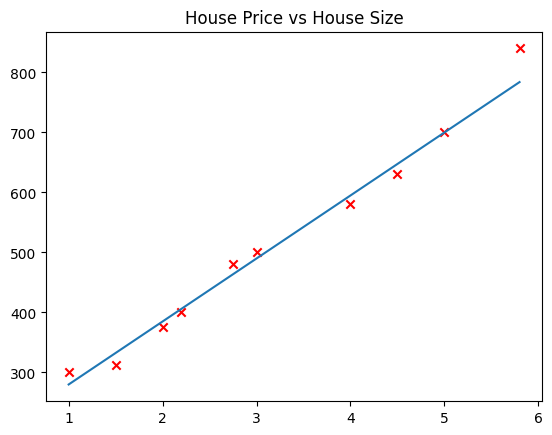

In [34]:
plt.scatter(x_train, y_train, marker="x", c="r")
plt.title("House Price vs House Size")
plt.plot(x_train, f_wb)
plt.show()

#### Section 3 - Calculate Cost Funtion

In [55]:
def calculate_cost(f_wb, y_train):
    for i in range(m):
        f_wb[i] = (f_wb[i] - y_train[i])**2
    
    cost = f_wb.sum()
    return cost / (2 * m)

In [56]:
w = 107.5
b = 172.5
f_wb = get_fwb(w, b, x_train)
print(f"Cost for w = {w} b = {b} is: {calculate_cost(f_wb, y_train): .5f}")


Cost for w = 107.5 b = 172.5 is:  225.38203


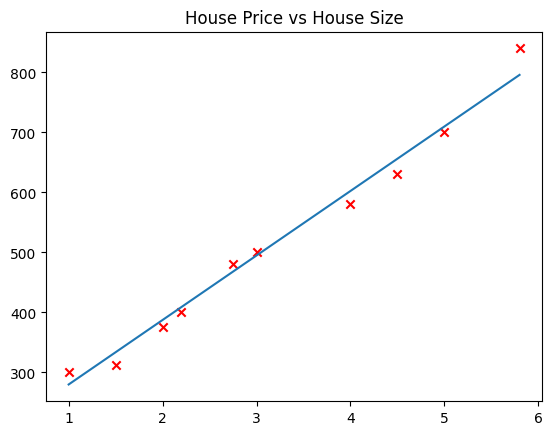

In [37]:
plt.scatter(x_train, y_train, marker="x", c="r")
plt.title("House Price vs House Size")
plt.plot(x_train, f_wb)
plt.show()

#### Section 4 - Make a prediction

In [52]:
def pred_price(w, b, x_test):
    return w * x_test + b

x_test = 3
y_pred = pred_price(w, b, x_test)
print(f"Price of house of size {x_test * 1000} sqft is: {y_pred}k")

Price of house of size 3000 sqft is: 492.46895376326336k


## Implementing Gradient Descent

In [39]:
def function(x):
     return x**2 + x + 1

def dydx(x):
    return 2*x + 1

def gradient_descent(x, alfa):
    temp_x = x - alfa * dydx(x)
    return temp_x

x = 20
print(f"Value of function(x) for x = {x} is {function(x)}")
print("> Running gradient descent 100 times\n\n")
for i in range(100):
    x = gradient_descent(x, 0.11)
    
    print(f"{i+1}> Value of function(x) for x = {x} is {function(x)}")

Value of function(x) for x = 20 is 421
> Running gradient descent 100 times


1> Value of function(x) for x = 15.49 is 256.43010000000004
2> Value of function(x) for x = 11.9722 is 156.30577284000003
3> Value of function(x) for x = 9.228316000000001 is 95.39013219585603
4> Value of function(x) for x = 7.088086480000001 is 58.32905642795881
5> Value of function(x) for x = 5.418707454400001 is 35.78109793077014
6> Value of function(x) for x = 4.116591814432001 is 22.062919981080555
7> Value of function(x) for x = 3.1009416152569607 is 13.71678051648941
8> Value of function(x) for x = 2.308734459900429 is 8.638989266232155
9> Value of function(x) for x = 1.6908128787223347 is 5.549661069575643
10> Value of function(x) for x = 1.208834045403421 is 3.6701137947298212
11> Value of function(x) for x = 0.8328905554146684 is 2.5265972327136232
12> Value of function(x) for x = 0.5396546332234413 is 1.8308817563829682
13> Value of function(x) for x = 0.3109306139142842 is 1.4076084605833978
14> V

### Gradient Descent of Our Squared error cost function

cost for w = 100 and b = 100 is 4764.7
1: cost for w = 135.37324999999998 and b = 110.362 is 1360.1207137190047
2: cost for w = 119.05647438062502 and b = 107.2300724375 is 662.3470172387986
3: cost for w = 126.00749223397612 and b = 110.14129079194171 is 513.0022069939345
4: cost for w = 122.49555972241453 and b = 110.30463214211197 is 475.01402774371
5: cost for w = 123.69918238971157 and b = 111.67654837342639 is 459.86617222196327
6: cost for w = 122.78797922610205 and b = 112.47718860274271 is 449.6235890705972
7: cost for w = 122.83544794764633 and b = 113.50799611172488 is 440.64398802633707
8: cost for w = 122.45839869683336 and b = 114.40883634371966 is 432.1796870234742
9: cost for w = 122.27912867275037 and b = 115.34226860104144 is 424.06952861089604
10: cost for w = 122.01747956925075 and b = 116.23563336596881 is 416.27149030093494
11: cost for w = 121.79939544966037 and b = 117.12210895615141 is 408.7680267309878
12: cost for w = 121.56807896098816 and b = 117.9872381101

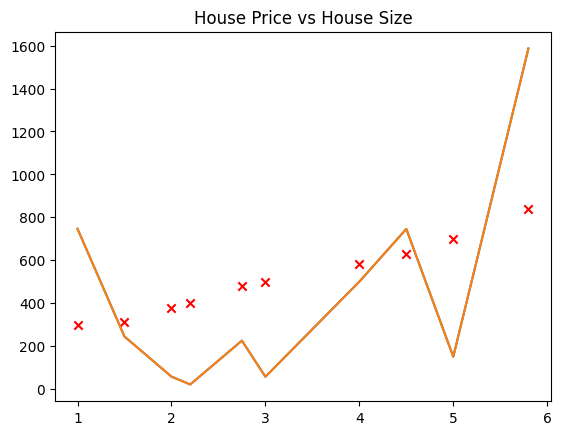

In [91]:
# We will start with an initial guess of w = 100, b = 100

w = 100
b = 100
f_wb = get_fwb(w, b, x_train)
cost = calculate_cost(f_wb, y_train)
print(f"cost for w = {w} and b = {b} is {cost}")

def d_cost_dw(x, y, w, b):
    summation = 0
    
    for i in range(m):
        result = ( ( (w * x[i]) + b) - y[i]) * x[i]
        
        summation += result
    
    return summation / m

def d_cost_db(x, y, w, b):

    summation = 0

    for i in range(m):
        result = ( ( (w * x[i]) + b) - y[i])
        
        summation += result
    return summation / m

def sq_error_cf_gradient_descent(w, b, x, y, alfa):
    w_temp = w - alfa * d_cost_dw(x, y, w, b)
    b_temp = b - alfa * d_cost_db(x, y, w, b)

    return w_temp, b_temp

# f_wb = y_pred
alfa = 0.11

for i in range(1, 1001):

    w, b = sq_error_cf_gradient_descent(w, b, x_train, y_train, alfa) # Update values of our W ad B
    f_wb = get_fwb(w, b, x_train) # Get new predections from our Liner regression model using updated values
    cost = calculate_cost(f_wb, y_train) # Calculate cost of the new model
    print(f"{i}: cost for w = {w} and b = {b} is {cost}")


plt.show()

